# <u> Calculating rate of return 

The **yfinance** library provides a simple way to download financial data from Yahoo Finance. It allows users to retrieve a wide range of financial information, and return it as a **Pandas DataFrame**.

In [1]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <u>Individual Stocks

In [23]:
startDate = datetime.datetime(2000,1,3)
endDate = datetime.datetime(2024,1,31)

MSFT = yf.Ticker('MSFT')
MSFT_data = MSFT.history(start=startDate, end=endDate)

- The **'Ticker'** class is used to represent a specific financial instrument or asset, such as a stock. 
- The **history()** Method of the Ticker class is used to retrieve historical market data for the specified asset. 

In [24]:
MSFT_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-24 00:00:00-05:00,401.540009,405.630005,400.450012,402.559998,24867000,0.0,0.0
2024-01-25 00:00:00-05:00,404.320007,407.010010,402.529999,404.869995,21021200,0.0,0.0
2024-01-26 00:00:00-05:00,404.369995,406.170013,402.429993,403.929993,17803300,0.0,0.0
2024-01-29 00:00:00-05:00,406.059998,409.980011,404.329987,409.720001,24510200,0.0,0.0
2024-01-30 00:00:00-05:00,412.260010,413.049988,406.450012,408.589996,33477600,0.0,0.0


### 1. Simple Rate of Return

Given by the formula: $$ \frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1 $$

In [25]:
#add new column with the simple return calculations to the original dataframe
MSFT_data['Simple Return'] = (MSFT_data['Close']/MSFT_data['Close'].shift(1)) - 1
print (MSFT_data['Simple Return'])

Date
2000-01-03 00:00:00-05:00         NaN
2000-01-04 00:00:00-05:00   -0.033780
2000-01-05 00:00:00-05:00    0.010544
2000-01-06 00:00:00-05:00   -0.033499
2000-01-07 00:00:00-05:00    0.013068
                               ...   
2024-01-24 00:00:00-05:00    0.009175
2024-01-25 00:00:00-05:00    0.005738
2024-01-26 00:00:00-05:00   -0.002322
2024-01-29 00:00:00-05:00    0.014334
2024-01-30 00:00:00-05:00   -0.002758
Name: Simple Return, Length: 6057, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

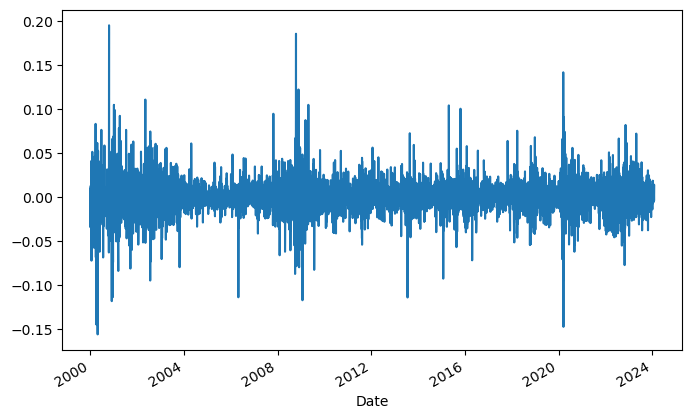

In [26]:
MSFT_data['Simple Return'].plot(figsize=(8,5))
plt.show

In [27]:
avg_returns_daily = MSFT_data['Simple Return'].mean()
avg_returns_daily

0.0005853574694030566

In [28]:
# Assuming 250 trading days in a year
avg_returns_annual = avg_returns_daily * 250
avg_returns_annual

0.14633936735076414

In [29]:
print(f'{round(avg_returns_annual,5)*100}%')

14.634%


### 2. Log Returns

$$ ln \frac{P_t}{P_{t-1}} $$

In [30]:
#the log function is from the numpy package
MSFT_data['log return'] = np.log(MSFT_data['Close']/(MSFT_data['Close'].shift(1)))
print (MSFT_data['log return'])

Date
2000-01-03 00:00:00-05:00         NaN
2000-01-04 00:00:00-05:00   -0.034364
2000-01-05 00:00:00-05:00    0.010489
2000-01-06 00:00:00-05:00   -0.034073
2000-01-07 00:00:00-05:00    0.012984
                               ...   
2024-01-24 00:00:00-05:00    0.009133
2024-01-25 00:00:00-05:00    0.005722
2024-01-26 00:00:00-05:00   -0.002324
2024-01-29 00:00:00-05:00    0.014232
2024-01-30 00:00:00-05:00   -0.002762
Name: log return, Length: 6057, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

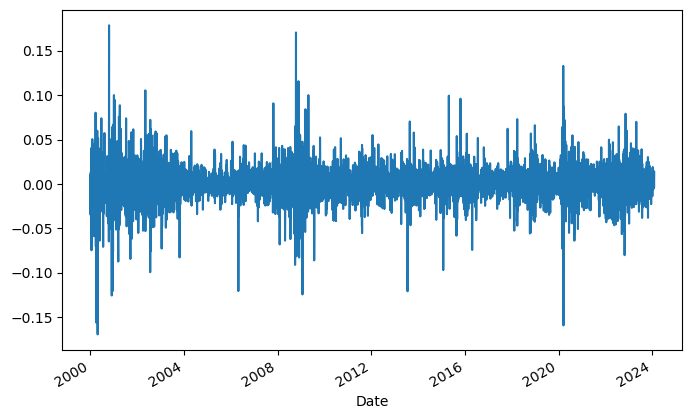

In [31]:
MSFT_data['log return'].plot(figsize=(8,5))
plt.show

In [32]:
log_returns_daily = MSFT_data['log return'].mean()
log_returns_daily

0.00040051615009044567

In [33]:
# Assuming 250 trading days in a year
log_returns_annual = log_returns_daily * 250
log_returns_annual

0.10012903752261142

In [34]:
print (str(round(log_returns_annual,5)*100) + '%')

10.013%


- In general, it is preferable to use **simple returns** when calculating the returns of multiple securities in the same period.

- On the other hand, **log returns** are a better choice when we have only one security and we are calculating its return over multiple time periods.

## <u> Portfolio

### Calculating weighted average rate of return
Simple return of each stock is multiplied by their respective weights in the portfolio.

In [35]:
tickers_list = ['MSFT', 'AAPL', 'GOOG', 'META']
weights = np.array([0.25,0.25,0.25,0.25])
startDate = datetime.datetime(2024,1,3)
endDate = datetime.datetime(2024,1,31)

data = yf.download(tickers_list, startDate, endDate)['Close']

simple_returns_daily = ((data.pct_change() + 1).cumprod() -1)

average_return_daily = simple_returns_daily.mean()

average_return_annual = average_return_daily*250 

porfolio_return_annual = np.dot(weights, average_return_annual)

print(f'The annual return of the portfolio is {round(porfolio_return_annual*100,2)}%')

[*********************100%%**********************]  4 of 4 completed

The annual return of the portfolio is 1316.9%


The **download()** method is used to download data starting from a given date.

### Comparing returns 

In [36]:
ticker_list = ['MSFT', 'AAPL', 'META', 'GOOG']

In [37]:
data = yf.download(ticker_list,'2010-1-1')['Close']

[*********************100%%**********************]  4 of 4 completed


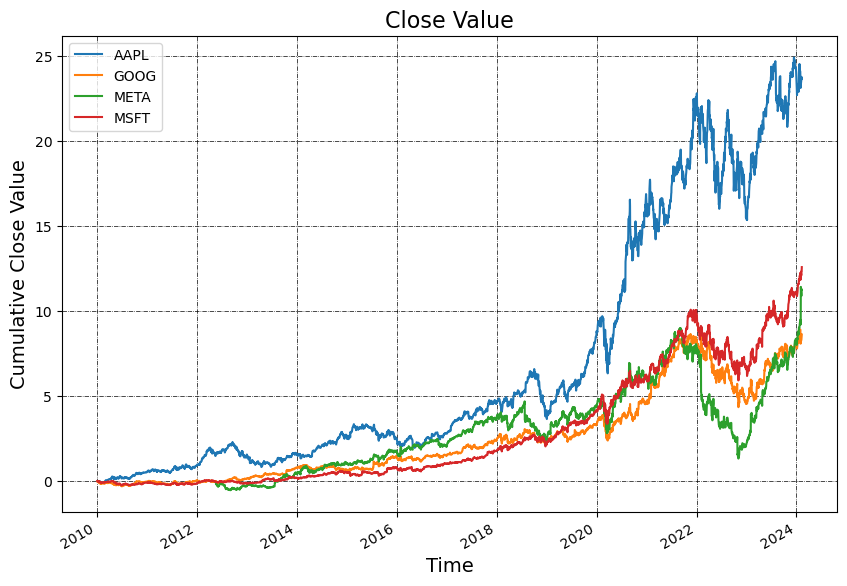

In [38]:
( (data.pct_change() +1) .cumprod() -1).plot(figsize=(10,7))
plt.legend()
plt.title("Close Value", fontsize=16)
plt.ylabel('Cumulative Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()               

The **.pct_change()** calculates the percentage change of the values in the DataFrame data.

**data.pct_change() + 1)** adds 1 to the daily percentage change. This step is performed to convert the percentage change to a multiplier. For example, if the daily percentage change is 2%, adding 1 results in a multiplier of 1.02.

**.cumprod()** calculates the cumulative product of the above result. It essentially computes the cumulative returns over time (cumulative return multiplier day 2 = return multiplier day2 * return multiplier day1).

1 is subtracted from the cumulative returns in order to convert the cumulative returns back to a percentage form, making it more interpretable. Otherwise they would be in absolute terms. 
<br><br><br><br> 


# Some additional notes

### 1. Normalisation to 100

A trick used so that all lines start from the same spot 100. The following equation on its first iteration divides value from row one by itself, giving 1, which is then multiplied by 100. In the line chart, all the lines will initie from the same point. 

$$ \frac{P_t}{P_0} * 100 $$

<function matplotlib.pyplot.show(close=None, block=None)>

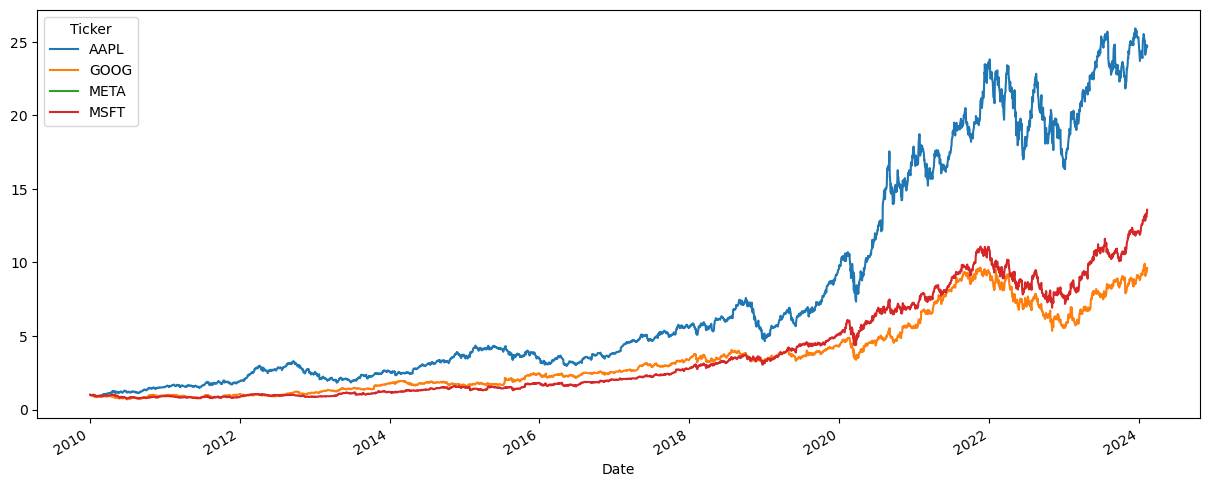

In [39]:
(data/data.iloc[0]).plot(figsize= (15,6))
plt.show

# iloc is used to get the row using zero based indexing. Here we get the values
# of the first row 

The use of the cumulative product (**cumprod**) effectively avoids the need to normalize the returns to 100 by using a multiplier. When you multiply consecutive daily returns, you get a cumulative product that represents the total growth or decline over time.

If you were to normalize the returns to 100, you would start with an initial value of 100 and then apply the daily returns to calculate the new values. However, using the cumulative product achieves a similar outcome by directly representing the growth factor over time.

In the context of plotting cumulative returns, using the cumulative product is a common and convenient approach, as it directly shows how an investment would have grown or declined over the specified time period. It simplifies the process and provides a clear representation of the overall performance of the investments.

### 2. Alternative to using **.shift()**:  
- <u> **Pandas.DataFrame.pct_change()** computes simple returns directly.

In [40]:
s_rets_1 = (data / data.shift(1)) - 1
s_rets_1.head()

Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,NaN,0.000323
2010-01-06,-0.015906,-0.025209,NaN,-0.006137
2010-01-07,-0.001849,-0.023280,NaN,-0.010400
2010-01-08,0.006648,0.013331,NaN,0.006897


In [41]:
s_rets_2 = data.pct_change()
s_rets_2.head()

Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,NaN,0.000323
2010-01-06,-0.015906,-0.025209,NaN,-0.006137
2010-01-07,-0.001849,-0.023280,NaN,-0.010400
2010-01-08,0.006648,0.013331,NaN,0.006897


A few arguments can be used in the percentage change method. The most important one is **'period'** as it specifies the difference between prices in the nominator. By default, it equals one. Let's assume we would like to calculate simple returns with the following formula: 

$$
\frac{P_t - P_{t-2}}{P_{t-2}}
,$$
Then, we should specify 'periods = 2' in parentheses: 

#### Using .pct_change() is different when calculating log returns:
Mathematically, it will look like this:

$$
ln(\frac{P_t}{P_{t-1}} ) = ln( \frac{P_t - P_{t-1}}{P_{t-1}} + \frac{P_{t-1}}{P_{t-1}}) = ln(\ simple.returns + 1)
.$$

In [42]:
log_rets_1 = np.log(data / data.shift(1))
log_rets_1.tail()

Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2024-02-05,0.009798,0.009637,-0.033351,-0.013638
2024-02-06,0.008595,0.003307,-0.010261,-0.000395
2024-02-07,0.000581,0.008696,0.032178,0.020891
2024-02-08,-0.005771,0.003675,0.000873,0.000145
2024-02-09,0.002810,0.020173,-0.004029,0.015432


In [43]:
log_rets_2 = np.log(data.pct_change() + 1)
log_rets_2.tail()

Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2024-02-05,0.009798,0.009637,-0.033351,-0.013638
2024-02-06,0.008595,0.003307,-0.010261,-0.000395
2024-02-07,0.000581,0.008696,0.032178,0.020891
2024-02-08,-0.005771,0.003675,0.000873,0.000145
2024-02-09,0.002810,0.020173,-0.004029,0.015432
